# MATH 307  --   What is it useful for

## Interpolation of data points

In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

Lets imaging you what to interpolate between some given data points for a project with some scientist on the other side of the earth. 

You get the following data point
(x_0, y_0) = (-3, 1) ; (x_1,y_1) = (0, -2) ; (x_2,y_2) = (2, 2)

In [2]:
x = np.array([-1, -0.8, 0])
y = np.array([8, 5.5, 3])
A = np.vander(x,increasing=True)

In [3]:
print(A)

[[ 1.   -1.    1.  ]
 [ 1.   -0.8   0.64]
 [ 1.    0.    0.  ]]


The matrix A gives use a linear system we can solve to find the interpolation between these points 

In [4]:
c = la.solve(A,y)

In [5]:
print(c)

[3.    4.375 9.375]


This is the solution of the system Ac = y. Lets see how the plot looks like

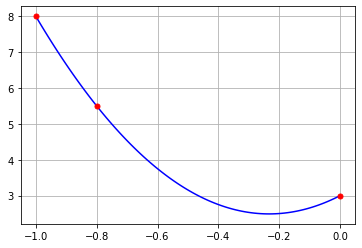

In [6]:
T = np.linspace(-1,0,100)
Y = c[0] + c[1]*T + c[2]*T**2 
plt.plot(T,Y,'b-',x,y,'r.',markersize=10)
plt.grid(True)
plt.show()

Then an email reaches you and you get the information that there has to be the additional constraint Y(-1.5) = 0. 
In other words you get an additional data point (x_3, y_3) = (-1/3, 3) 

In [7]:
x = np.array([-1, -0.8, -1/3, 0])
y = np.array([8, 5.5,3,3])
A = np.vander(x,increasing=True)

In [8]:
print(A)

[[ 1.         -1.          1.         -1.        ]
 [ 1.         -0.8         0.64       -0.512     ]
 [ 1.         -0.33333333  0.11111111 -0.03703704]
 [ 1.          0.          0.          0.        ]]


In [9]:
c = la.solve(A,y)

In [10]:
print(c)

[ 3.          1.16071429  2.14285714 -4.01785714]


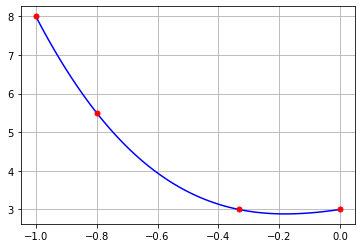

In [11]:
T = np.linspace(-1,0,100)
Y = c[0] + c[1]*T + c[2]*T**2 + c[3]*T**3 
plt.plot(T,Y,'b-',x,y,'r.',markersize=10)
plt.grid(True)
plt.show()

That is still all fine. Now lets assume we get the following set of data points which was constructed by a lot of measurements with a very faulty measurement device.

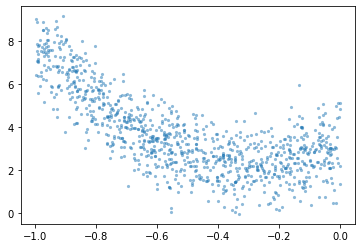

In [12]:
c0 = 3
c1 = 5
c2 = 8
c3 = -2
N = 1000
t = np.random.rand(N) - 1 # Random numbers in the interval (-1,1)
noise = np.random.randn(N)
y = c0 + c1*t + c2*t**2 + c3*t**3 + noise
plt.scatter(t,y,alpha=0.5,lw=0,s=10);
plt.show()

The plot of the datapoints has resemblence with the previous plot. But how do we find a solution to describe these data points with minimal error.

In [13]:
A = np.column_stack([np.ones(N),t,t**2])

We solve $\left( A^T A \right) \mathbf{c} = \left( A^T \right) \mathbf{y}$ which gives us the least-square solution

In [14]:
c = la.solve(A.T @ A,A.T @ y)


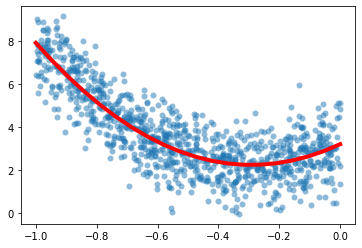

In [15]:
ts = np.linspace(-1,0,20)
ys = c[0] + c[1]*ts + c[2]*ts**2 
plt.plot(ts,ys,'r',linewidth=4)
plt.scatter(t,y,alpha=0.5,lw=0)
plt.show()

### Image deblurring

In [16]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [17]:
kitten = plt.imread('data/kitten.jpg').astype(np.float64)

In [18]:
N = 256
c = np.zeros(N)
s = 5
c[:s] = (s - np.arange(0,s))/(3*s)
Ac = la.toeplitz(c)
r = np.zeros(N)
s = 20
r[:s] = (s - np.arange(0,s))/(3*s)
Ar = la.toeplitz(r)

In [19]:
B = Ac@kitten@Ar.T + 0.01*np.random.randn(256,256)

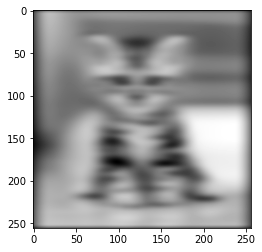

In [20]:
plt.imshow(B,cmap='gray')
plt.show()

The image of the kitten is blurred by some noise $E$, so that 

$$
A_c X A_r^T = B + E
$$

How do we find $X$, i.e. the unblurred image of the kitten?

We compute using the truncated pseudoinverse

$$
X = (A_c)_k^+ B (A_r^T)_k^+
$$

In [21]:
Pc,Sc,QTc = la.svd(Ac)
Pr,Sr,QTr = la.svd(Ar)

In [22]:
k = 50
Dc_k_plus = np.hstack([1/Sc[:k],np.zeros(N-k)])
Dr_k_plus = np.hstack([1/Sr[:k],np.zeros(N-k)])
Ac_k_plus = QTc.T @ np.diag(Dc_k_plus) @ Pc.T
Ar_k_plus = Pr @ np.diag(Dr_k_plus) @ QTr
X = Ac_k_plus @ B @ Ar_k_plus

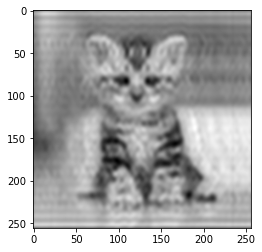

In [23]:
plt.imshow(X,cmap='gray')
plt.show()

In [24]:
k = 100
Dc_k_plus = np.hstack([1/Sc[:k],np.zeros(N-k)])
Dr_k_plus = np.hstack([1/Sr[:k],np.zeros(N-k)])
Ac_k_plus = QTc.T @ np.diag(Dc_k_plus) @ Pc.T
Ar_k_plus = Pr @ np.diag(Dr_k_plus) @ QTr
X = Ac_k_plus @ B @ Ar_k_plus

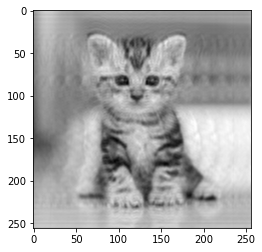

In [25]:
plt.imshow(X,cmap='gray')
plt.show()

In [26]:
k = 200
Dc_k_plus = np.hstack([1/Sc[:k],np.zeros(N-k)])
Dr_k_plus = np.hstack([1/Sr[:k],np.zeros(N-k)])
Ac_k_plus = QTc.T @ np.diag(Dc_k_plus) @ Pc.T
Ar_k_plus = Pr @ np.diag(Dr_k_plus) @ QTr
X = Ac_k_plus @ B @ Ar_k_plus

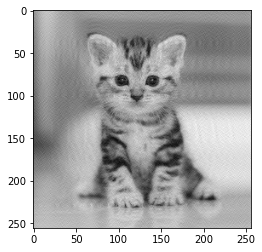

In [27]:
plt.imshow(X,cmap='gray')
plt.show()

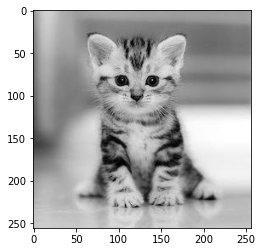

In [28]:
plt.imshow(kitten,cmap='gray')
plt.show()